<a href="https://colab.research.google.com/github/DhawalKhandait/Online-Retail-Customer-Segmentation-Clustering/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** **Dhawal Khandait**


## **What is Customer Segmentation -**
* Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes.
* The groups should be homogeneous within themselves and should also be heterogeneous to each other.
* Customer segmentation can help a company to understand how its customers are alike, what is important to them, and what is not.
* The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.
* Such information can be used to develop personalized relevant content for different customer bases.
* Many studies have found that customers appreciate such individual attention and are more likely to respond and buy the product.

# **Project Summary -**

**1. Data Exploration:**

a. Data Cleaning & Wrangling

**2. Exploratory Data Analysis:**

1. Top 5 & Bottom 5 Product name based on selling.
2. Top 5 & Bottom 5 StockNames based on selling.
3. Top 5 & Bottom 5 countries that have maximum number of customers.
4. Distribution of Quantity column
5. Distribution of UnitPrice column
6. Purchasing frequency count done with respect to days.
7. Customers frequency count by months.
8. Shopping time frame of customers.

**3. Feature Engineering :-**

**4. Balancing the target variable :-**

**5. Building models -**

a. K-Means Clustering

 (i) Apply Elbow Method

b. Silhoutte Method

c. Hierarchical Clustering

d. DBSCAN

# **GitHub Link -**

https://github.com/DhawalKhandait/Online-Retail-Customer-Segmentation-Clustering

# **Problem Statement**


### **In this project, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [112]:
# Importing the libraries

import numpy as np
import pandas as pd
import datetime as dt
from numpy import math
from pylab import rcParams

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Clustering (ML)/Online Retail.csv")

In [115]:
# copying the original dataset
data = df.copy()

### Dataset First View

In [116]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [117]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


### Dataset Rows & Columns count

In [118]:
# Dataset Rows & Columns count
# computing number of rows
rows= len(data.axes[0])

# computing number of columns
cols=len(data.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  541909
Number of Columns:  8


### Dataset Information

In [119]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [120]:
# Dataset Duplicate Value Count
data.duplicated().sum()

5268

In [121]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/11 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom


In [122]:
# deleting duplicated values from dataset
data=data.drop_duplicates()

In [123]:
# Dataset after drop Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [124]:
# Missing Values/Null Values Count
# Count total NaN at each row in a DataFrame

data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

<Axes: >

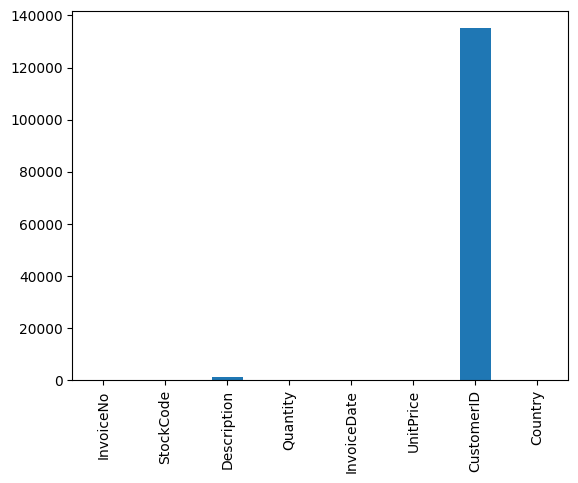

In [125]:
# Visualizing the missing values
data.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

In the dataset **CustomerID** column has **135037** null values are present and **Description** column has less number of null values which is 1454

In [126]:
# deleting the null values
data.dropna(inplace=True)

In [127]:
# Count total NaN at each row after drop null values in a DataFrame
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [128]:
# Shape of data
data.shape

(401604, 8)

After drop null value and drop duplicates value from dataset the shape of dataset is (401604, 8)

## ***2. Understanding Your Variables***

In [129]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [130]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

## **Attribute Information:**
**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides.

### **Need to drop some InvoiceNo which are starts with 'C',  because 'C' indicates a cancellation**

In [131]:
# Change the dtype of InvoiceNo column
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [132]:
# Data which is InvoiceID column is not start from C
data=data[~data['InvoiceNo'].str.contains('C')]

In [133]:
# Shape of data
data.shape

(392732, 8)

In [134]:
# Describe data
data.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### Check Unique Values for each variable.

In [135]:
# Check Unique Values for each variable.
data.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

## 3. ***Data Wrangling***

### What all manipulations have you done and insights you found?

* CustomerId has maximum num of null so, droping the null values was the best solution.
* Dataset had lots of duplicate values so deleting them was the best solution.
* Drop some InvoiceNo which are starts with 'C', because 'C' indicates a cancellation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [136]:
Description_df = data['Description'].value_counts().reset_index()
Description_df.rename(columns={'index' : 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description' : 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [137]:
Description_df.tail()


,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


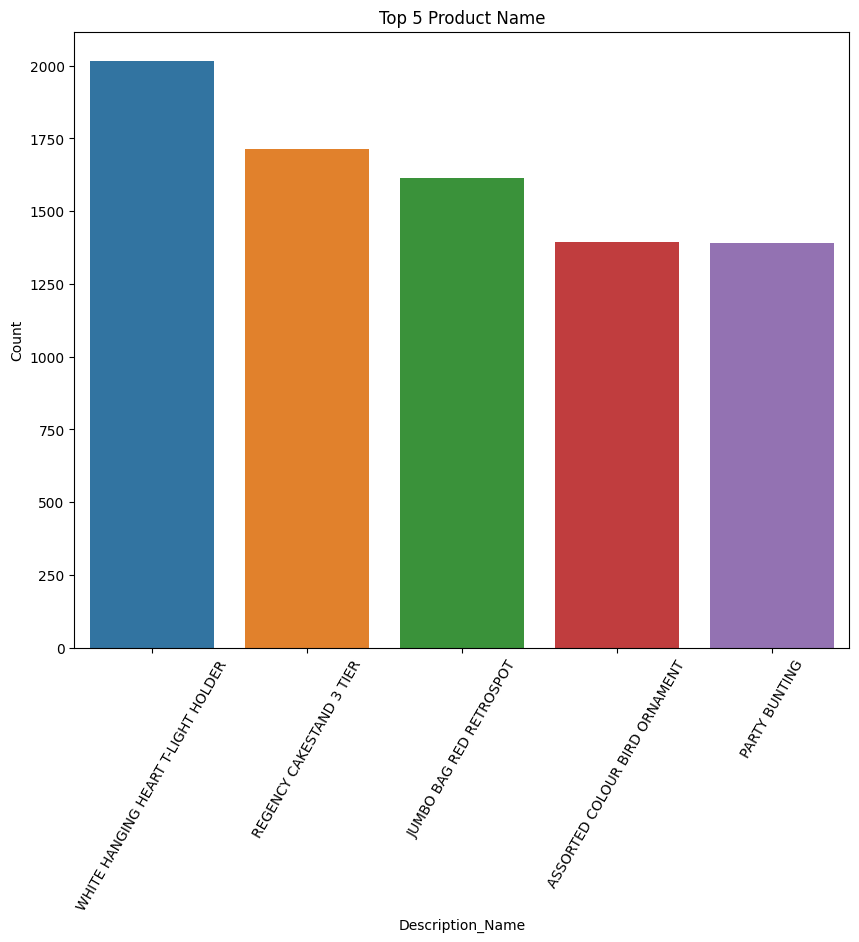

In [138]:
# Chart - 1 Plot of Top 5 Product Name
plt.figure(figsize=(10,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])
plt.xticks(rotation=60)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.



##### 2. What is/are the insight(s) found from the chart?

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.ASSORTED COLOUR BIRD ORNAMENT

5.PARTY BUNTING

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above bar-plot helps creating positive business impact.

#### Chart - 2

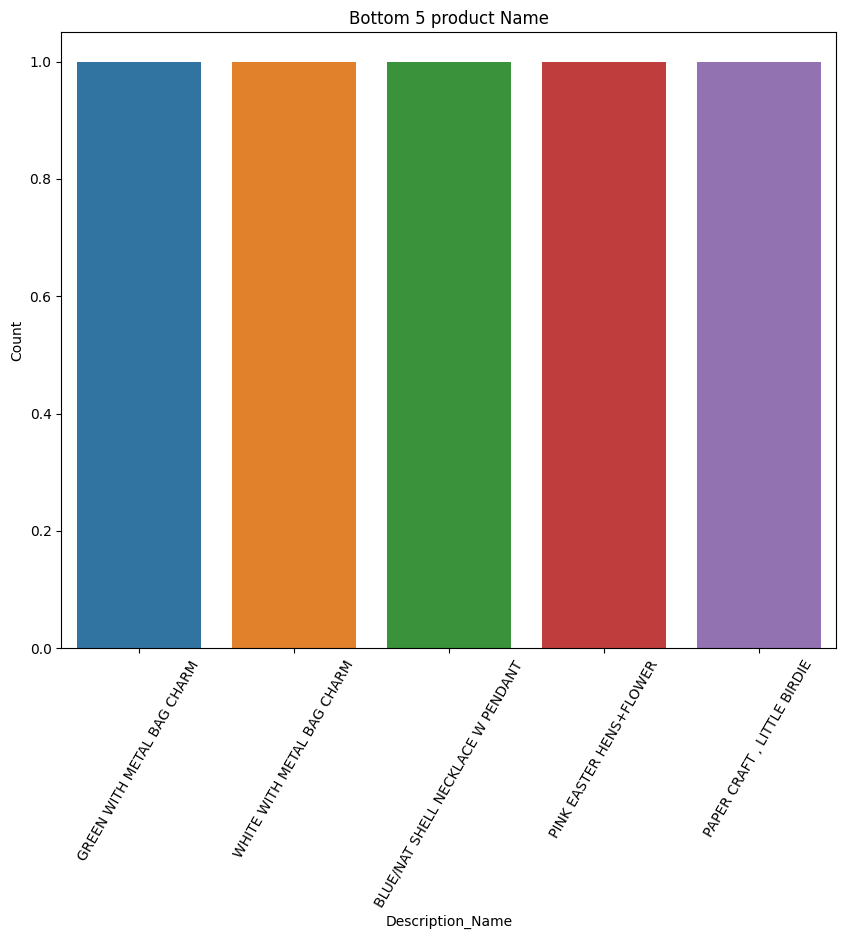

In [139]:
# Chart - 2 plot of Bottom 5 product Name
plt.figure(figsize=(10,8))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])
plt.xticks(rotation=60)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.



##### 2. What is/are the insight(s) found from the chart?

**Bottom 5 Product based on the selling are:**

1.gREEN WITH METAL BAG CHARM

2.WHITE WITH METAL BAG CHARM

3.BLUE/NAT SHELL NECKLACEW PENDANT

4.PINK EASTER HENS+FLOWER

5.PAPER CRAFT, LITTLE BIRDIE

#### Chart - 3

In [140]:
Stockcode_df = data['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name', 'StockCode':'Count'}, inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


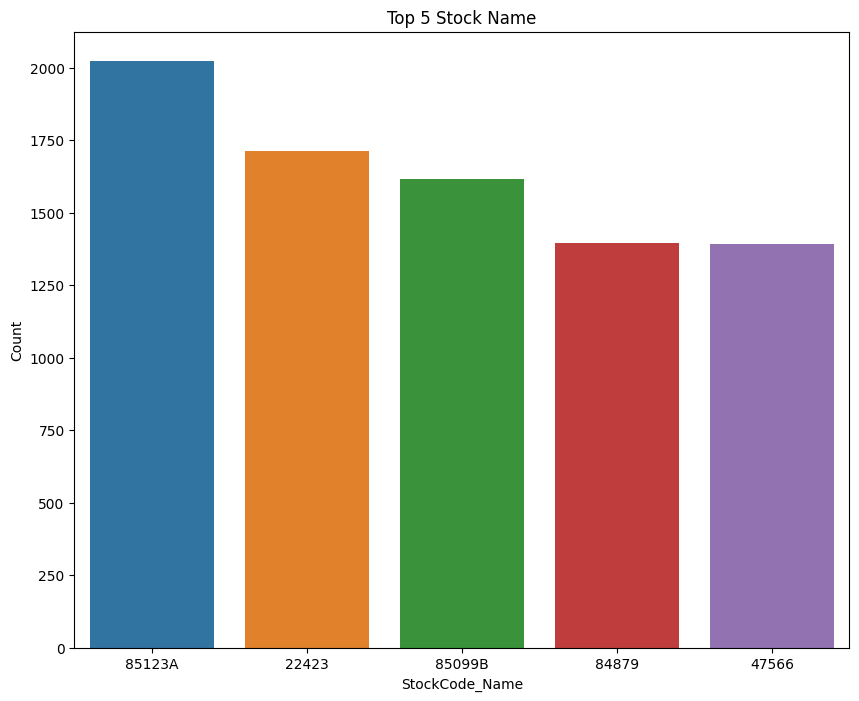

In [141]:
# Chart - 3 Plot of Top 5 Stock Name
plt.figure(figsize=(10,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name', y='Count', data=Stockcode_df[:5])
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Stock name based on selling are :**

1.85123A

2.22423

3.85099B

4.84879

5.47566

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above plot help creaeting positive business impact. It shows Top 5 stocks that are mostly sale.


#### Chart - 4

In [142]:
Stockcode_df.tail()

,StockCode_Name,Count
3660,20678,1
3661,90059D,1
3662,90168,1
3663,90169,1
3664,23843,1


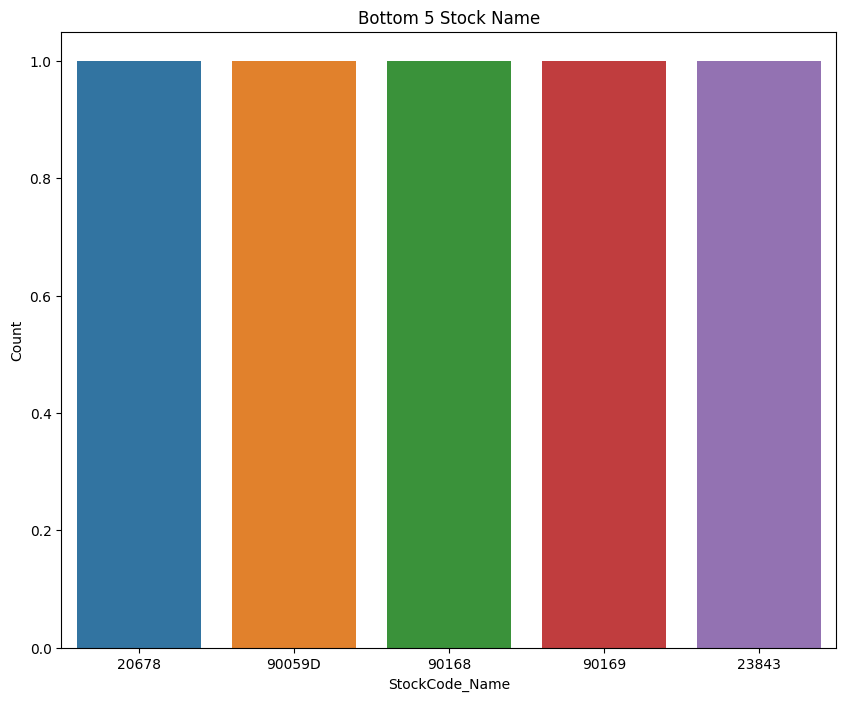

In [143]:
# Chart - 4 Plot of Bottom 5 Stock Name
plt.figure(figsize=(10,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name', y='Count', data=Stockcode_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

**Bottom 5 Stock Name Based on Selling are :**

1) 20678

2) 90059D

3) 90168

4) 90169

5) 23843

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above gained insight helps creating positive business impact , as it helps  us prevent shortage of stocks.

#### Chart - 5

In [144]:
Country_df = df['Country'].value_counts().reset_index()
Country_df.rename(columns={'index':'Country_Name', 'Country':'Count'}, inplace=True)
Country_df.head()

,Country_Name,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


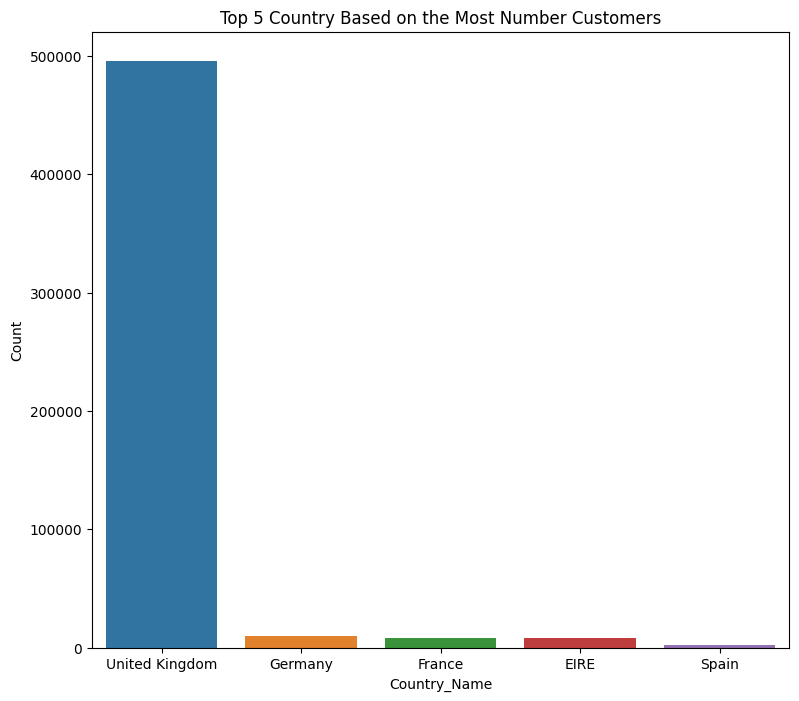

In [145]:
# Chart - 5 Plot of Top 5 Country having maximum number of customers
plt.figure(figsize=(9,8))
plt.title('Top 5 Country Based on the Most Number Customers')
sns.barplot(x='Country_Name', y='Count', data=Country_df[:5])
plt.show()

In [146]:
# checking the transaction % in UK
uk_trnsc = round(len(df[df['Country']=='United Kingdom']) / len(df) * 100,2)
print(f"{uk_trnsc}% transaction are from United Kingdom")

91.43% transaction are from United Kingdom


##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

- From this graph we can see that **most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**
- **91.43% transaction are from United Kingdom**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Above plot help creating positive business impact. From the above plot we can conclude the selling done with respect to the countries

#### Chart - 6

In [147]:
Country_df.tail()

,Country_Name,Count
33,Lithuania,35
34,Brazil,32
35,Czech Republic,30
36,Bahrain,19
37,Saudi Arabia,10


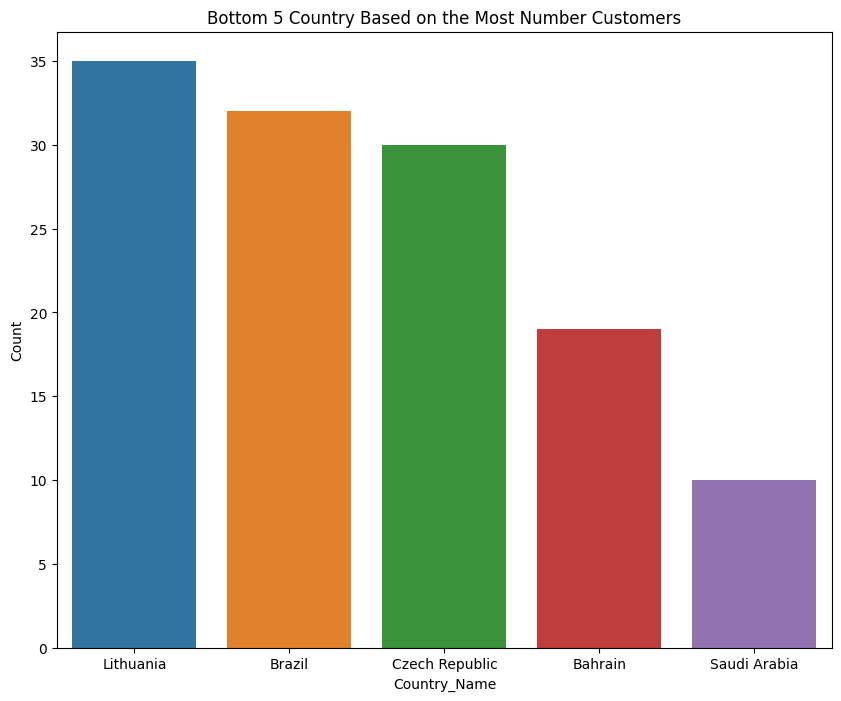

In [148]:
# Chart - 6 Plot of Bottom 5 Country having maximum number of customers
plt.figure(figsize=(10,8))
plt.title('Bottom 5 Country Based on the Most Number Customers')
sns.barplot(x='Country_Name', y='Count', data=Country_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

* From this graph we can see that **least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In order to create positive business impact,the customers are less in above counties so  we need to increase thr sales in above mentioned countries.

#### Chart - 7

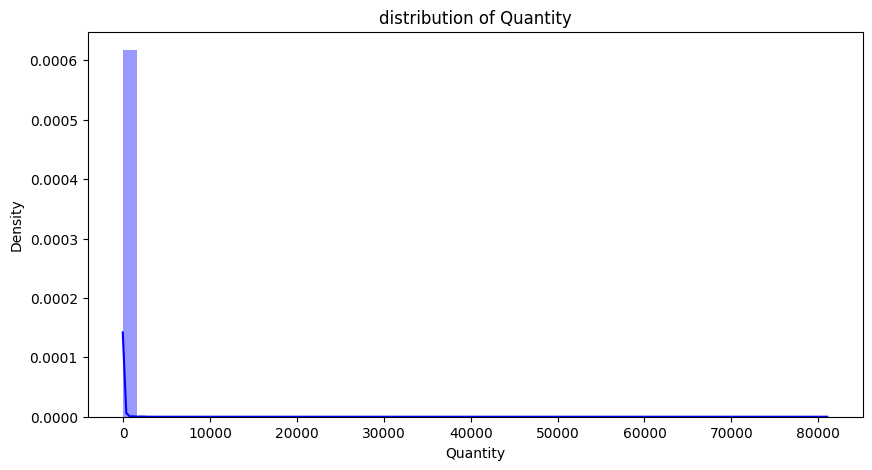

In [149]:
# Chart - 7 #distribution of Quantity
plt.figure(figsize=(10,5))
plt.title('distribution of Quantity')
sns.distplot(data['Quantity'],color="Blue")
plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables

##### 2. What is/are the insight(s) found from the chart?

- Quantity column shows Positively skewed (or right-skewed) distribution.
- The graph showing that most of the quantity distribution is at zero, which is not possible.
- We need to apply log tranformation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above plot leads to negative growth, as its showing quantity distribution near to  0 and this is not possible.

#### Chart - 8

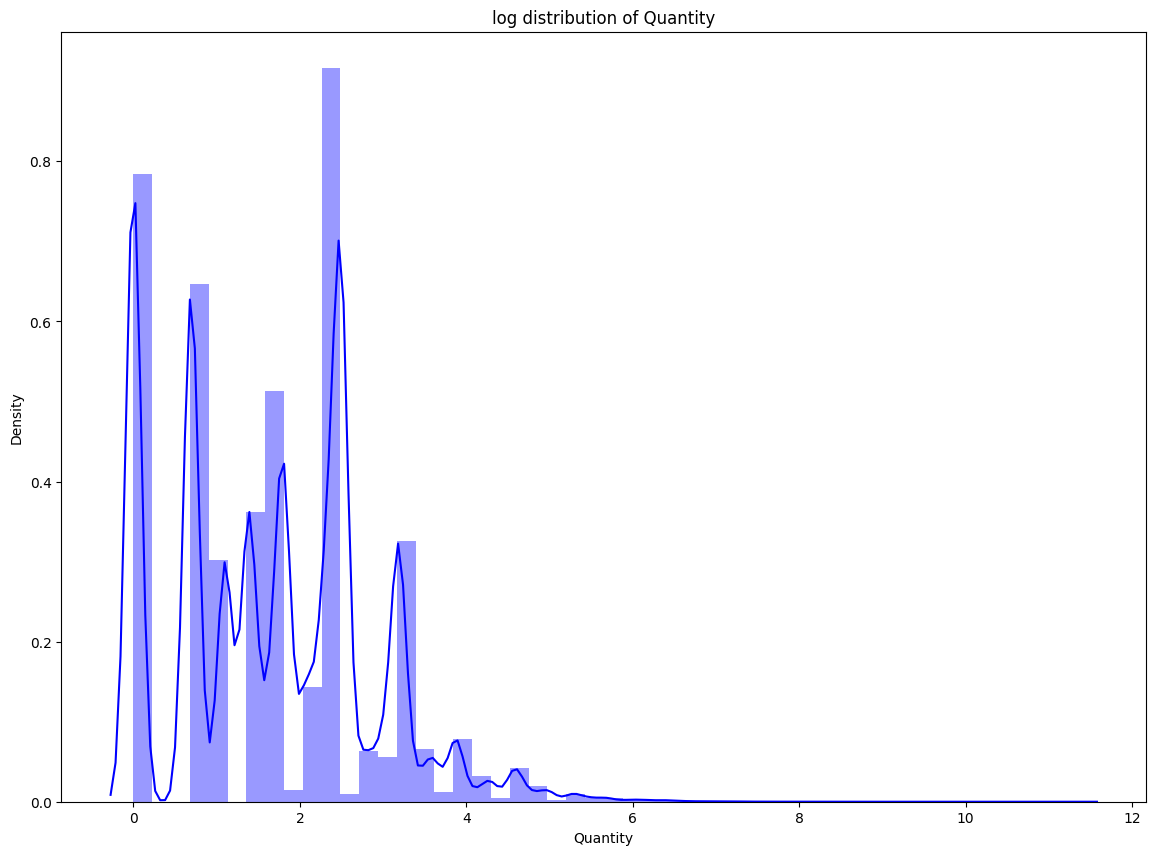

In [150]:
# Chart - 8 applying log transformation
plt.figure(figsize=(14,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(data['Quantity']),color="blue")
plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables

##### 2. What is/are the insight(s) found from the chart?

* After applying log transfromation, we can conclude quanitities are now sclaed from zero.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, now after after applying  tranformation get the desired distribution of quantity.

#### Chart - 9

<Axes: title={'center': 'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

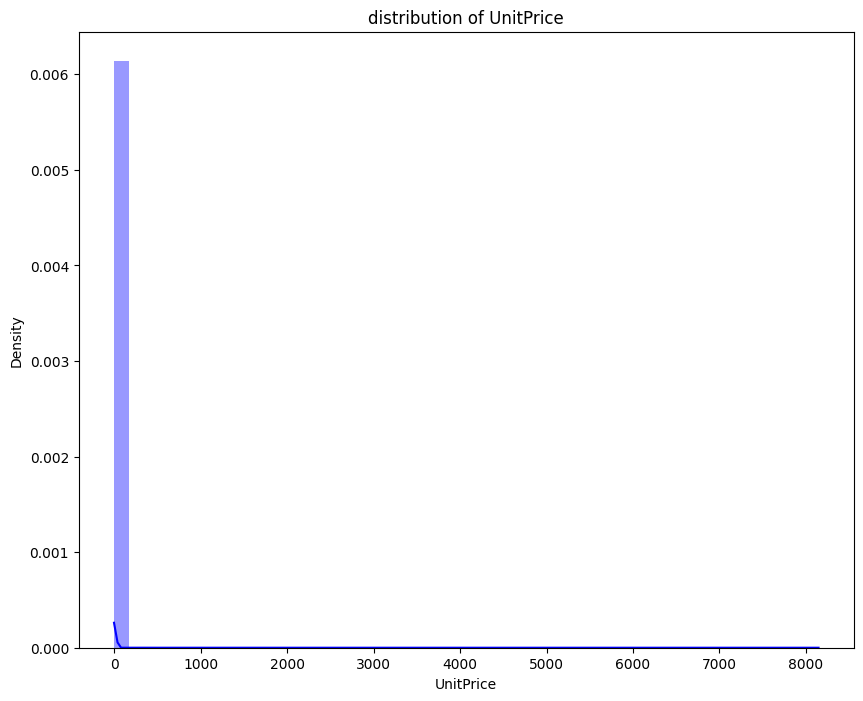

In [151]:
# Chart - 9 distribution of UnitPrice
plt.figure(figsize=(10,8))
plt.title('distribution of UnitPrice')
sns.distplot(data['UnitPrice'], color="blue")

In [152]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [153]:
data = data[data['UnitPrice']>0]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [154]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


## **Feature Engineering**

### **Convert InvoiceDate column into datetime format**

In [155]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%m/%d/%y %H:%M")

### **Create a new feature Day from InvoiceDate**

In [156]:
data['Day'] = data['InvoiceDate'].dt.day_name()

### **Create some new features from Invoicedate like hours,year,month_num,day_num**

In [157]:
data['year'] = data['InvoiceDate'].apply(lambda x: x.year)
data['month'] = data['InvoiceDate'].apply(lambda x: x.month)
data['Month_name'] = data['InvoiceDate'].dt.month_name()
data['day'] = data['InvoiceDate'].apply(lambda x: x.day)
data['hours'] = data['InvoiceDate'].apply(lambda x: x.hour)
data['minutes'] = data['InvoiceDate'].apply(lambda x: x.minute)

### **Create a new features TotalAmount from form product of Quantity and Unitprice**

In [158]:
data['Total_Amount'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,Month_name,day,hours,minutes,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34


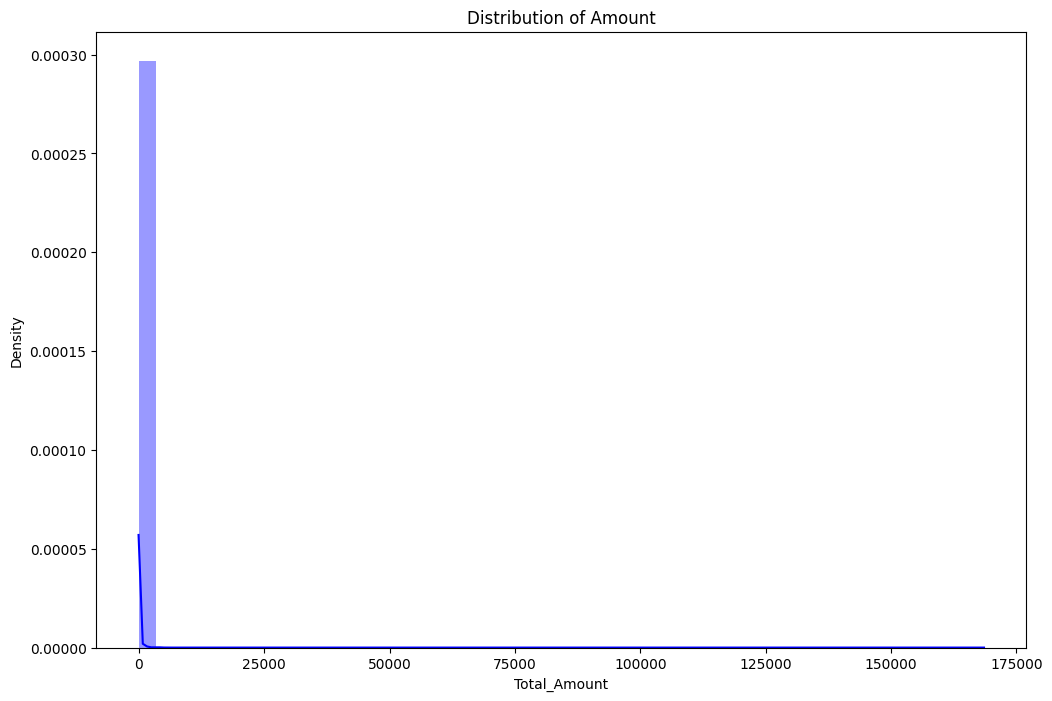

In [159]:
# Plotting Distribution of TotalAmount
plt.figure(figsize=(12,8))
plt.title("Distribution of Amount")
sns.distplot(data['Total_Amount'], color="blue")
plt.show()

In [160]:
data['Total_Amount'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: Total_Amount, dtype: float64

#### Chart - 10

In [161]:
day_df=data['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name','Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


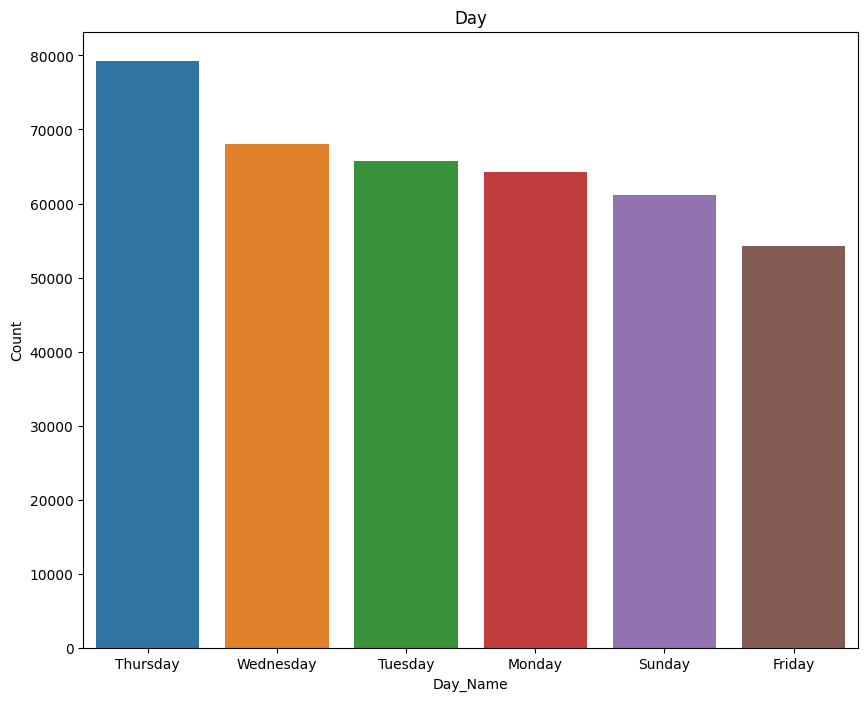

In [162]:
# Chart - 10 # plotting Bargrap of count of Days
plt.figure(figsize=(10,8))
plt.title("Day")
sns.barplot(x='Day_Name', y='Count', data=day_df)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily

##### 2. What is/are the insight(s) found from the chart?

Most of the customers have purches the items in Thursday ,Wednesday and Tuesday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above gain insight help creating positive business impact.

#### Chart - 11

In [163]:
month_df = data['Month_name'].value_counts().reset_index()
month_df.rename(columns={'index':'Month_Name', 'Month_name':'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


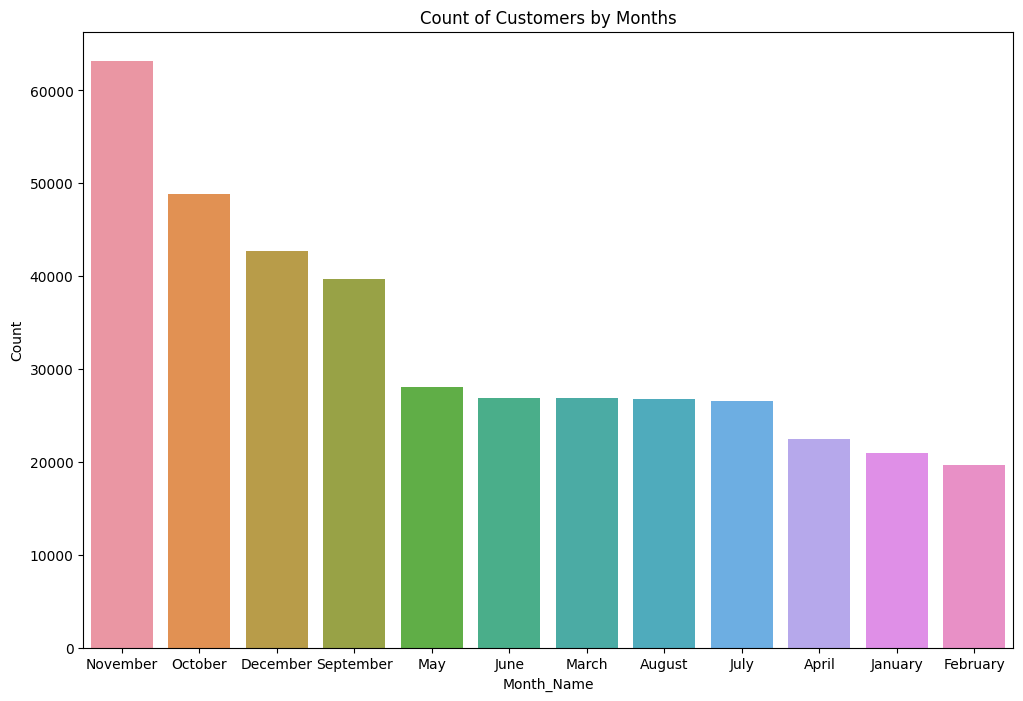

In [164]:
# Chart - 11 plot of no. of customers by months
plt.figure(figsize=(12,8))
plt.title('Count of Customers by Months')
sns.barplot(x='Month_Name', y='Count', data=month_df)
plt.show()

##### 1. Why did you pick the specific chart?

* The bar graph helps to compare the different sets of data among different groups easily.
* Above bar-plot is showing month wise selling.

##### 2. What is/are the insight(s) found from the chart?

- **Most numbers of customers have purches the gifts in the month of November ,October and December September**
- **less numbers of customers have purches the gifts in the month of April ,january and February**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact

#### Chart - 12

In [165]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,Month_name,day,hours,minutes,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34


In [166]:
hour_df = data['hours'].value_counts().reset_index()
hour_df.rename(columns={'index':'Total_hours', 'hours':'Count'}, inplace=True)
hour_df

,Total_hours,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


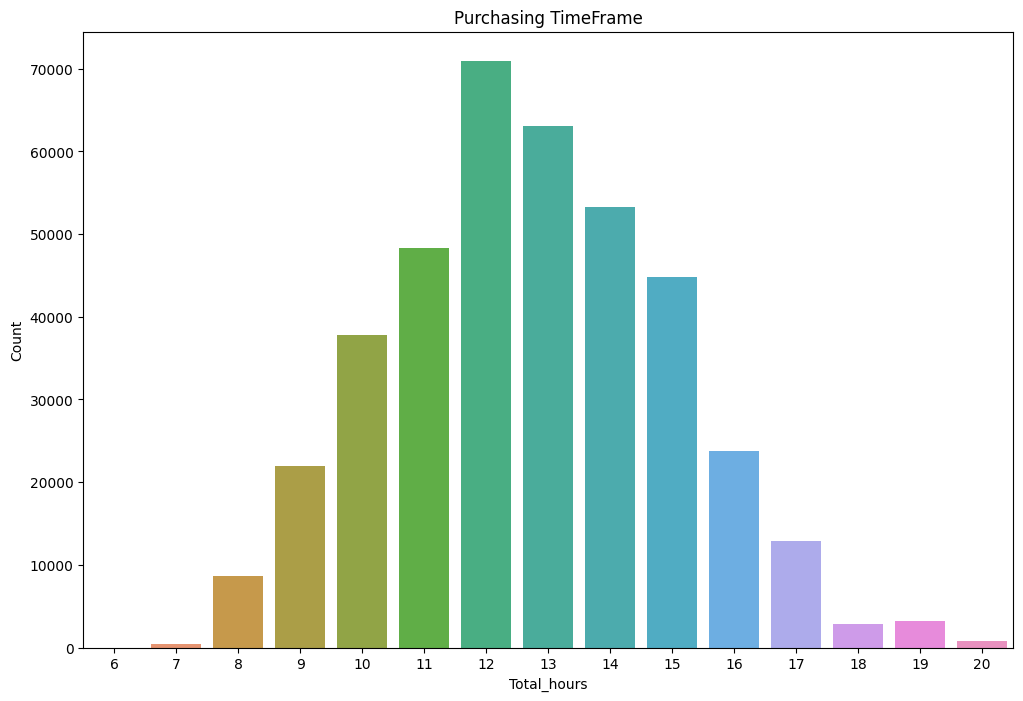

In [167]:
# Chart - 12 visualization code
plt.figure(figsize=(12,8))
plt.title('Purchasing TimeFrame')
sns.barplot(x='Total_hours', y='Count', data=hour_df)
plt.show()

##### 1. Why did you pick the specific chart?

* The bar graph helps to compare the different sets of data among different groups easily.
* Above plot is giving us the hourly selling down by customers.

##### 2. What is/are the insight(s) found from the chart?

- **Most of the customers used to do shopping in between the Time-Frame of 10:00 am - 05:00 pm**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above plot helps create positive business impact.

#### Chart - 13

In [168]:
def day_type(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [169]:
data['Day_type'] = data['hours'].apply(day_type)

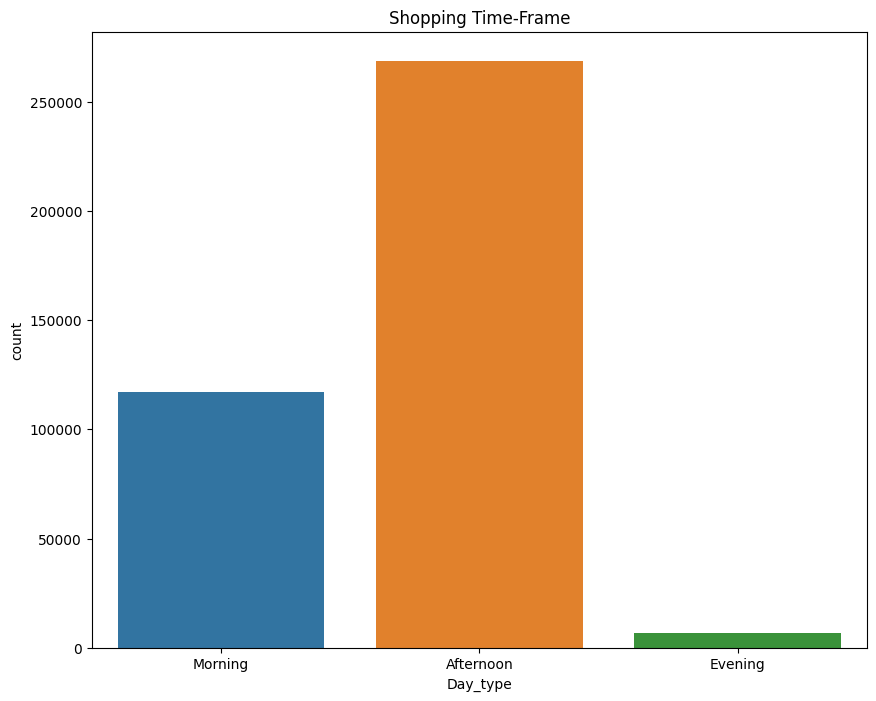

In [170]:
# Chart - 13 visualization code
plt.figure(figsize=(10,8))
plt.title("Shopping Time-Frame")
sns.countplot(x='Day_type', data=data)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

- **Most of the customers have purchase the items in Afternoon ,moderate numbers of customers have purchase the items in Morning and least numbers of customers have purchase the items in Evening**

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact

## ***6. Feature Engineering & Data Pre-processing***

## **No need for Feature Engineering as it has done earlier**

# **Create the RFM model (Recency, Frequency,Monetary value)**

**The RFM model is a customer segmentation framework used in marketing to identify and categorize customers based on their transactional behavior. RFM stands for Recency, Frequency, and Monetary value, which are the three key indicators used in this model to evaluate customer behavior.**

- **Recency: This measures how recently a customer has made a purchase.**
- **Frequency: This measures how often a customer has made a purchase.**
- **Monetary value: This measures the total amount of money a customer has spent on purchases. Customers who spend more money are considered to be more valuable to the business.**

**RFM analysis can help businesses tailor their marketing strategies to specific customer segments, such as sending targeted promotions to high-value customers or re-engaging low-value customers with special offers. By focusing their efforts on the most valuable customers, businesses can improve their marketing ROI and increase customer loyalty.**

**Performing RFM Segmentation and RFM Analysis, Step by Step**

- The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
- The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

**Calculating RFM scores -**
- The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111.
-Generally speaking, the higher the RFM score, the more valuable the customer.


In [171]:
max(data['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [172]:
print(data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Day', 'year', 'month',
       'Month_name', 'day', 'hours', 'minutes', 'Total_Amount', 'Day_type'],
      dtype='object')


In [173]:
latest_date = dt.datetime(2011,12,10)

# create RFM Modelling score for each customer

rfm_df = data.groupby('CustomerID').agg({'InvoiceDate':lambda x : (latest_date - x.max()).days, 'InvoiceNo': lambda x : len(x), 'Total_Amount' : lambda x : sum(x)})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total_Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [174]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

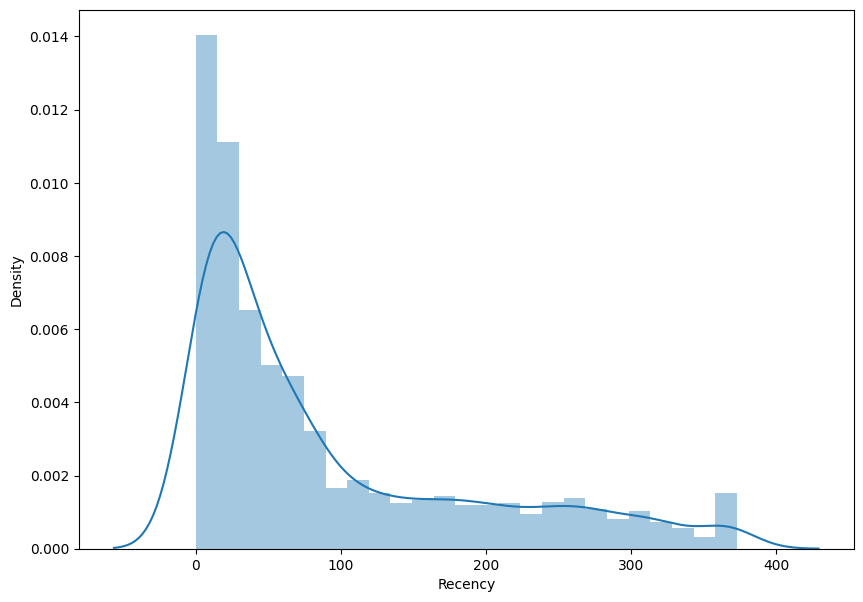

In [175]:
# Recency distribtuion plot
plt.figure(figsize=(10,7))
sns.distplot(rfm_df['Recency']);

#### **We can see that there are more customers who have purchased recently and the graph decrease furthur.**

## **Frequency**

**Frequency will helps us to know how many times a customer has purchased.**

In [176]:
#Descriptive Statistics (Frequency)
rfm_df['Frequency'].describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

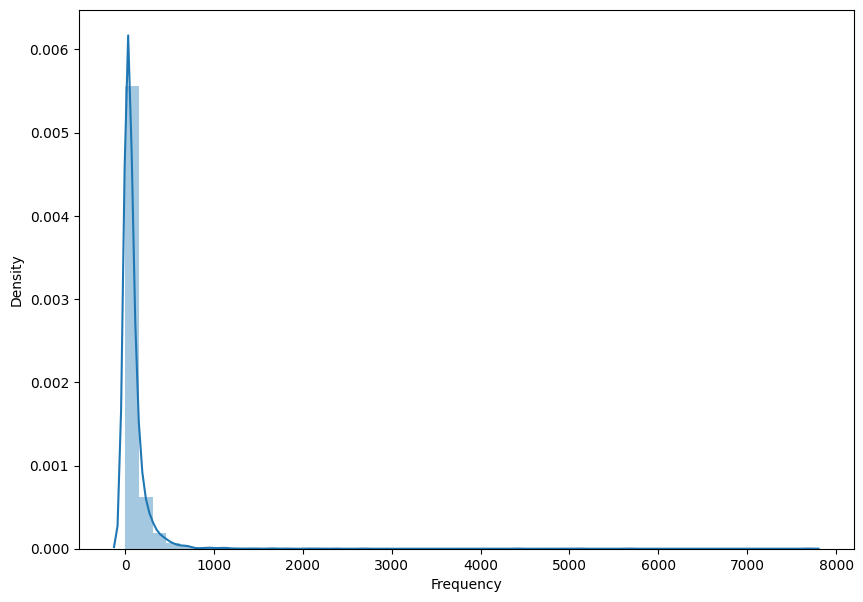

In [177]:
# Frequency Distribution plot
plt.figure(figsize=(10,7))
sns.distplot(rfm_df['Frequency']);

**The distribution of frequency is skewed.**

## **Monetary**

**This measures the total amount of money a customer has spent on purchases.**

In [178]:
#Descriptive Statistics (Frequency)
rfm_df.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

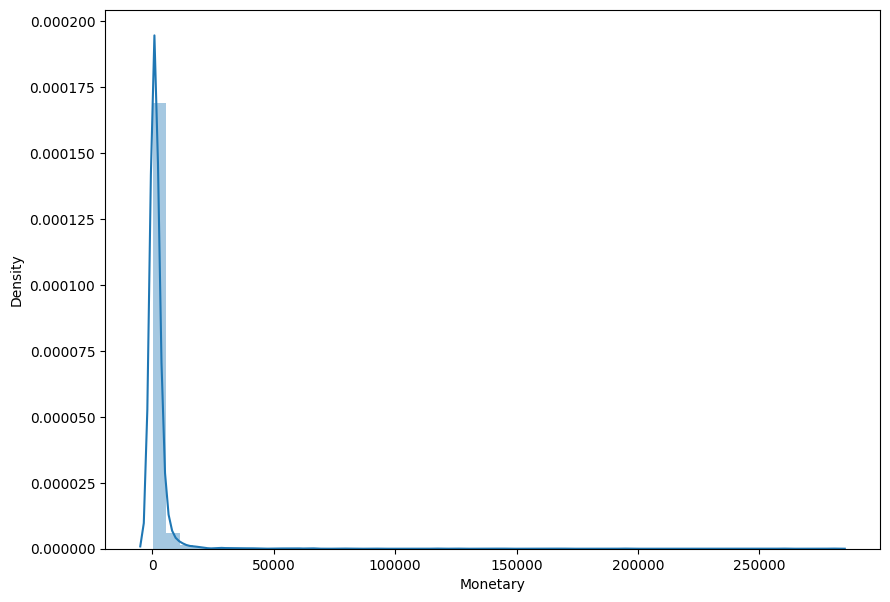

In [179]:
# Monetary distribution plot
plt.figure(figsize=(10,7))
sns.distplot(rfm_df['Monetary']);

**The distribution of monetary is also skewed.**

## **Split into Four Segment Using Quantiles**

In [180]:
# split into four segment using quantiles
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.00,17.0,306.4825
0.50,50.00,41.0,668.5700
0.75,141.75,98.0,1660.5975


- **We will assign the score from 1 to 4 on the basis of recency, frequency and monetary based on there quartiles. 4 being the best score and 1 being the worst score. A final score will be calculated simply by combining individual RFM scores.**

- **Higher recency is bad so it will get the lesser score but in case of frequency and monetary higher values are good so they will get higher scores.**

In [181]:
# Function to create R, F and M segments

def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

In [182]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,18,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


**We can see best recency i.e customer with most recently purchase has R=4 score and same is with Frequency and Monetary**

**We will combine the scores to create a single rfm score**

In [183]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,18,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [184]:
rfm_data = rfm_df[["Recency", "Frequency", "Monetary"]]
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


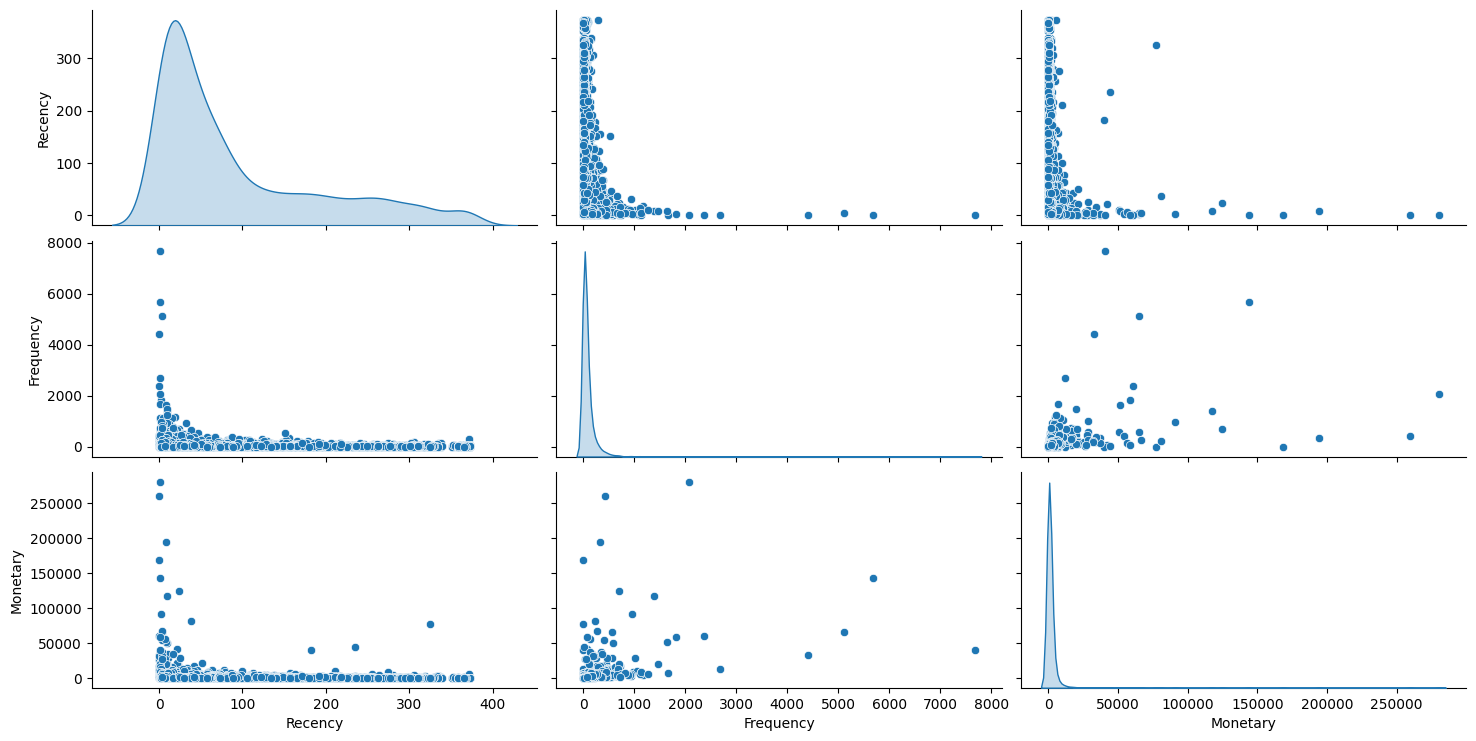

In [185]:
sns.pairplot(rfm_data, diag_kind="kde", aspect=2);

**We can see above the distributions are skewed**. As we require normally distributed data to perform K-means clustering we will apply log transformation to reduce skewness.

In [186]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_data['Recency'] = [handle_neg_n_zero(x) for x in rfm_data.Recency]
rfm_data['Monetary'] = [handle_neg_n_zero(x) for x in rfm_data.Monetary]

In [187]:
#log transformation
new_log_df = np.log(rfm_data)
new_log_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.783825,0.000000,11.253942
12347.0,0.693147,5.204007,8.368693
12348.0,4.317488,3.433987,7.494007
12349.0,2.890372,4.290459,7.471676
12350.0,5.736572,2.833213,5.812338


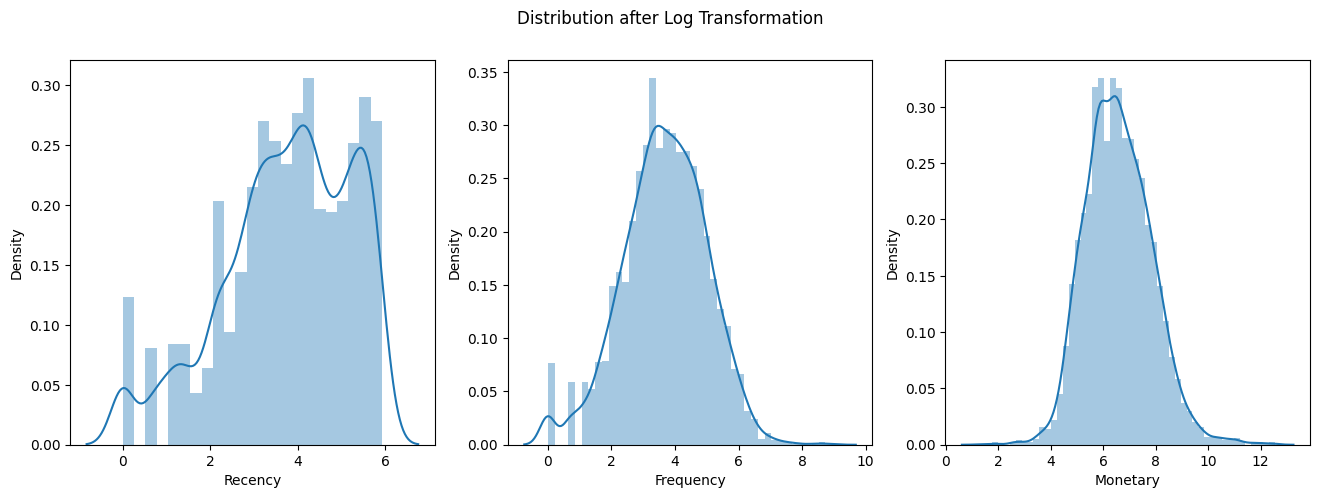

In [188]:
# Checking the distrbution after log transformation
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.distplot(new_log_df['Recency'])

plt.subplot(1,3,2)
sns.distplot(new_log_df['Frequency'])

plt.subplot(1,3,3)
sns.distplot(new_log_df['Monetary'])

plt.suptitle("Distribution after Log Transformation")
plt.show()

## **Scaling the data using StandardScaler**

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalizing data
norm_data = scaler.fit_transform(new_log_df)

## ***7. ML Model Implementation***

##**K-Means Clustering**

Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We will use the K-means clustering algorithm to determine the ideal segments of customers.

## **Applying Elbow Method**

First, we will build multiple clusters on our RFM data and will try to find out the optimal number of clusters in our data using the Elbow method.

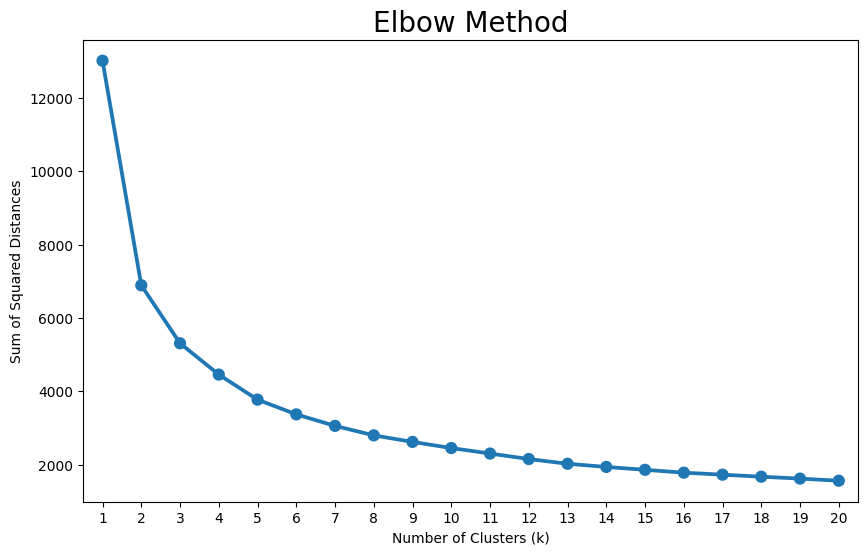

In [190]:
# Sum of square distances
sum_of_sqr_dist = {}

# fitting k-means
for k in range(1,21):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km = km.fit(norm_data)
  sum_of_sqr_dist[k] = km.inertia_

# plotting elbow method graph
plt.figure(figsize=(10,6))

sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters (k)');
plt.ylabel('Sum of Squared Distances')
plt.show()

As the number of clusters increases, the variance (within-cluster sum of squared distances) decreases.From above elbow method we can consider **optimal k-value = 2**.

In [191]:
# using k=2
km = KMeans(n_clusters=2,max_iter=1000, random_state=1)
cluster_labels = km.fit_predict(norm_data)
print(cluster_labels)

[1 0 1 ... 1 0 0]


In [192]:
# assigning clusters
rfm_df['Cluster']=cluster_labels

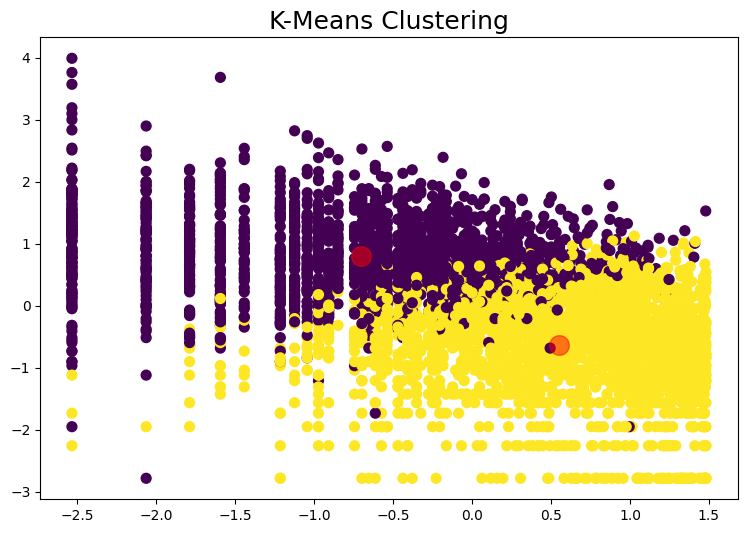

In [193]:
# visualizing clusters
plt.figure(figsize=(9,6))
plt.scatter(norm_data[:, 0], norm_data[:, 1], c=cluster_labels, s=50)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.title('K-Means Clustering', fontsize=18)
plt.show()

## **Evaluation using Silhoutte Method**

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

**we will try clusters k= 3, 4 and 5 and check their silhouette coefficient.**

In [194]:
silhouette = []
for n_clusters in range(2,11):
    clusterer = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    preds = clusterer.fit_predict(norm_data)
    score = silhouette_score(norm_data, preds)
    silhouette.append(score)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", score)

For n_clusters = 2 The average silhouette_score is : 0.39559432494517566
For n_clusters = 3 The average silhouette_score is : 0.30491529648926674
For n_clusters = 4 The average silhouette_score is : 0.302534892366643
For n_clusters = 5 The average silhouette_score is : 0.27928357397614934
For n_clusters = 6 The average silhouette_score is : 0.2789622081412315
For n_clusters = 7 The average silhouette_score is : 0.26355351937449034
For n_clusters = 8 The average silhouette_score is : 0.2642980631007053
For n_clusters = 9 The average silhouette_score is : 0.25309412290790045
For n_clusters = 10 The average silhouette_score is : 0.26026903207449037


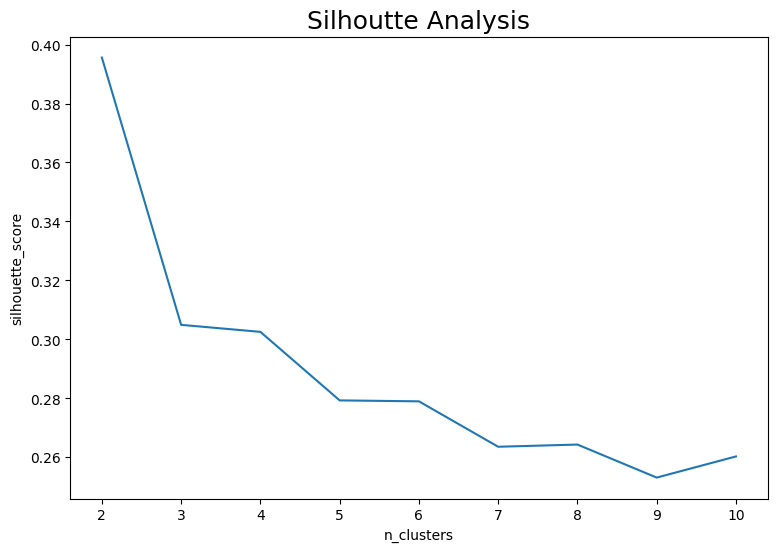

In [195]:
# plotting Silhoutte scores
plt.figure(figsize=(9,6))
n_clusters = [x for x in range(2,11)]
df_silhouette = pd.DataFrame({'n_clusters':n_clusters,'silhouette_score':silhouette})
sns.lineplot(data=df_silhouette, x="n_clusters", y="silhouette_score")
plt.title('Silhoutte Analysis', fontsize=18)
plt.show()

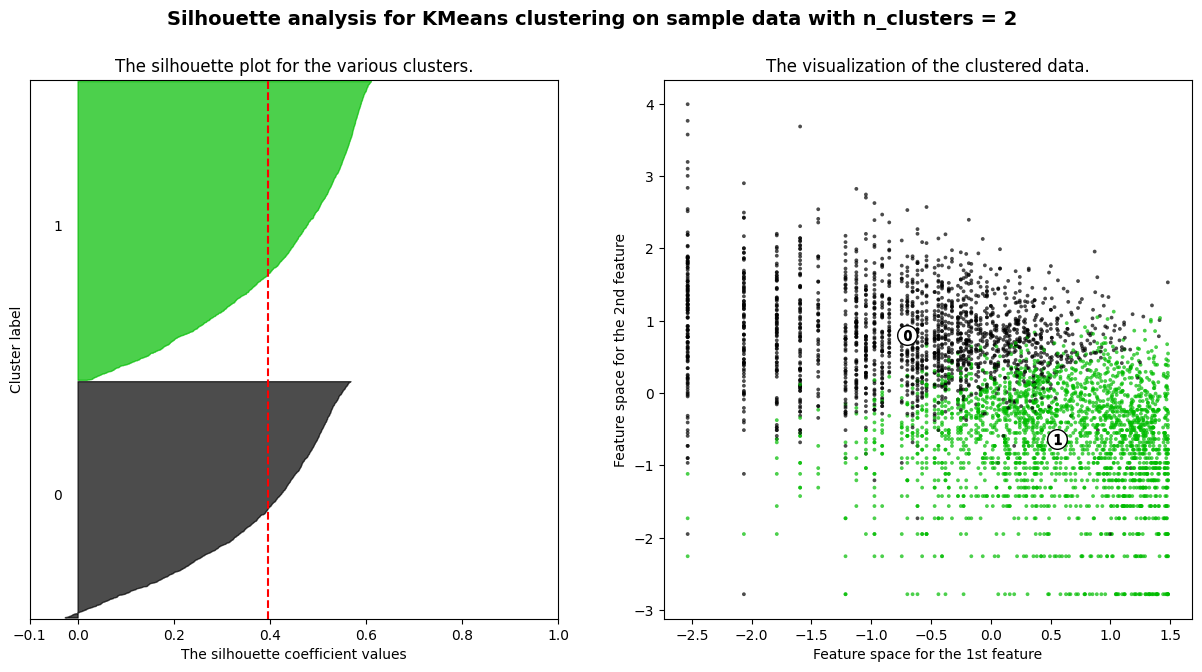

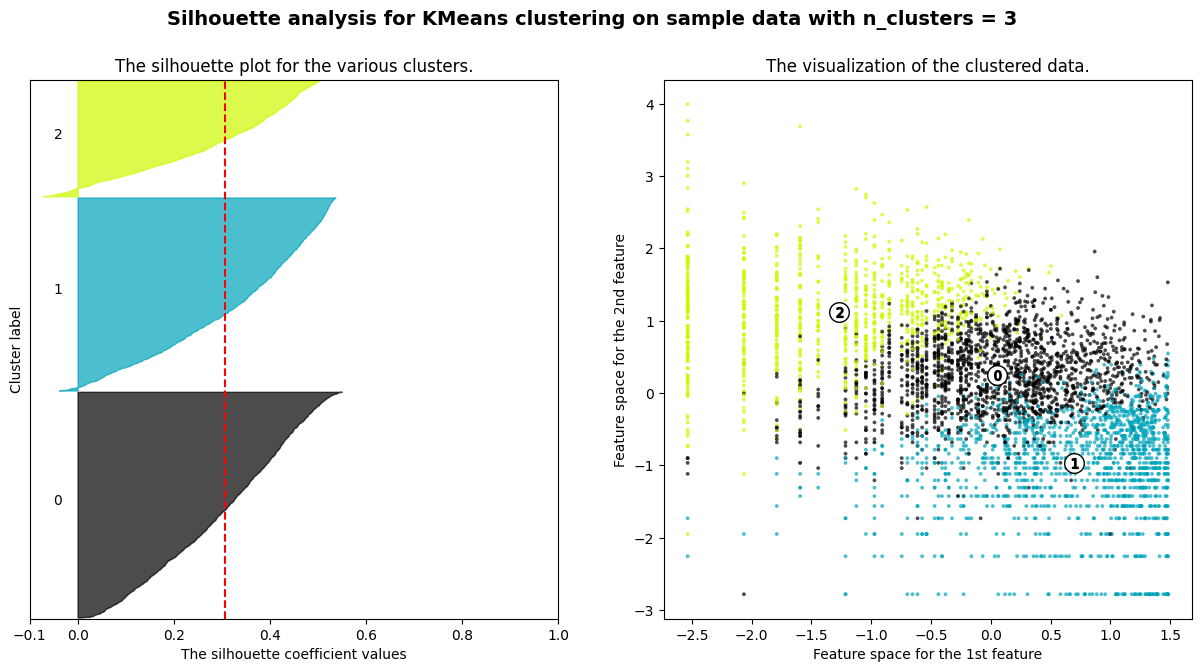

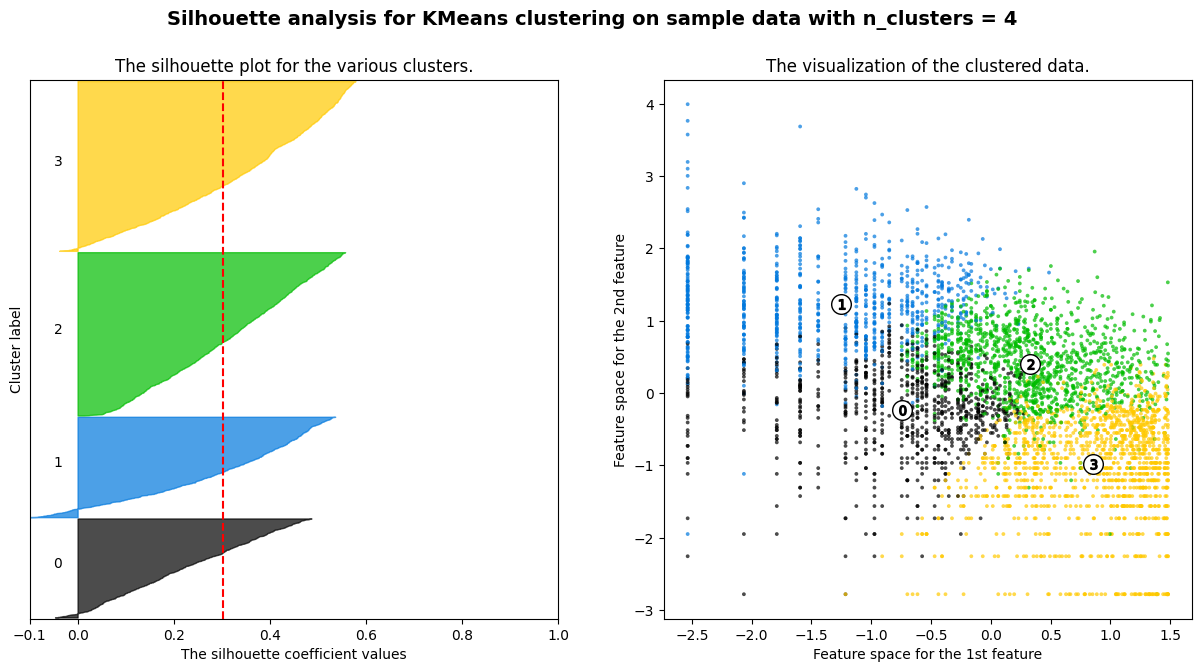

In [196]:
# plot silhoutte score
X = norm_data
range_n_clusters = [2,3,4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**The best silhouette score obtained is when the number of clusters is 2.**

## **Hierarchical Clustering**

Let’s first draw the dendrogram to help us decide the number of clusters

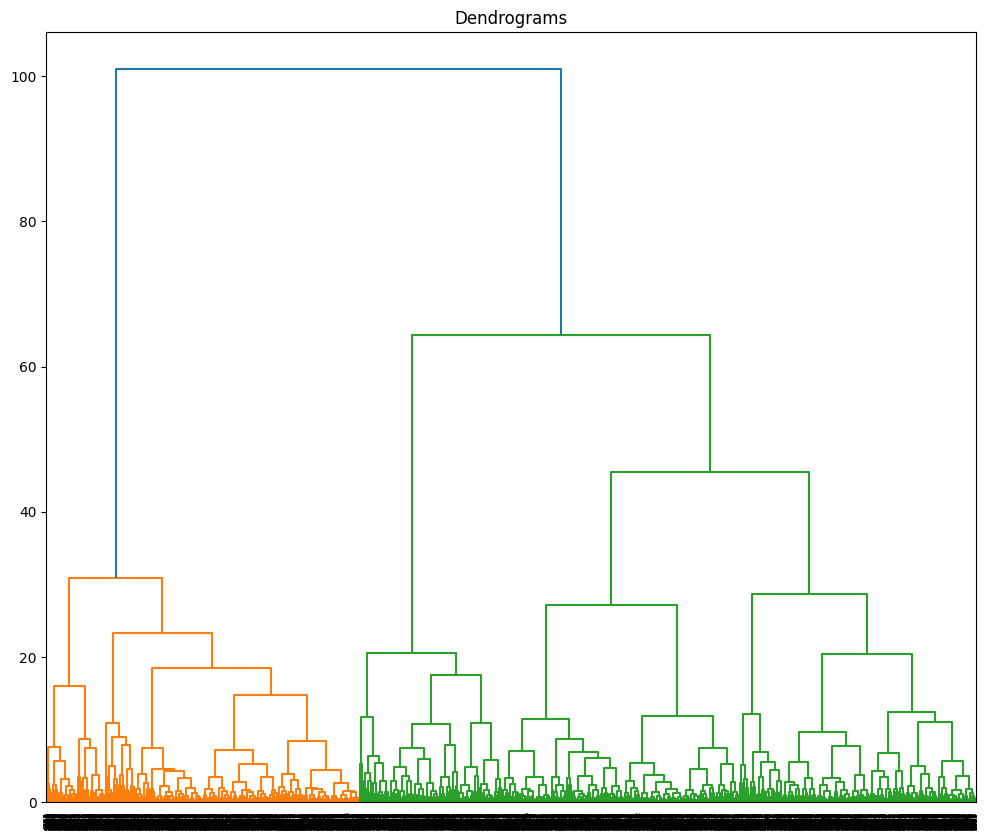

In [197]:
# dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12,10))
dend = shc.dendrogram(shc.linkage(norm_data, method='ward'))
plt.title("Dendrograms")
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 70.

We have two clusters. Let’s now apply hierarchical clustering for 2 clusters

In [198]:
# Fitting hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(norm_data)

array([1, 0, 0, ..., 0, 0, 0])

In [199]:
# assigning hierarchical clusters
rfm_df['HR_labels']=cluster.labels_

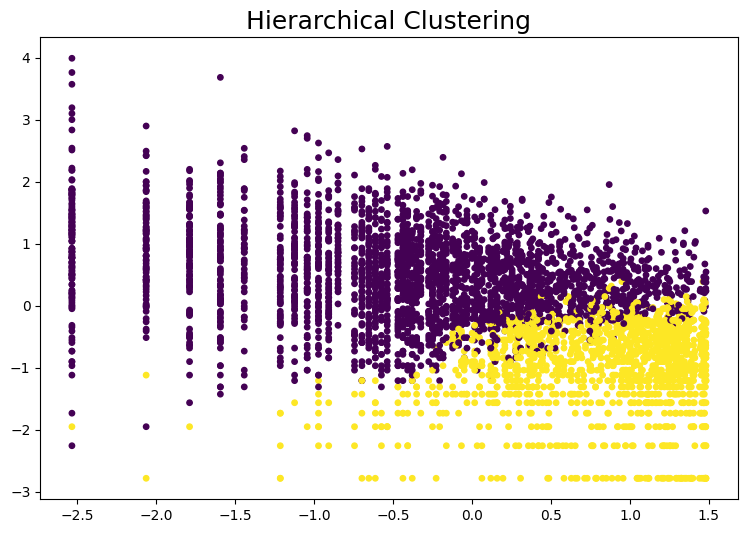

In [200]:
# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1],c=rfm_df['HR_labels'],s=15)

plt.title('Hierarchical Clustering', fontsize=18)
plt.show()

**We can see that ,Customers are well separate when we use Hierarchical clustering and number of clusters equal to 2**

# **DBSCAN**

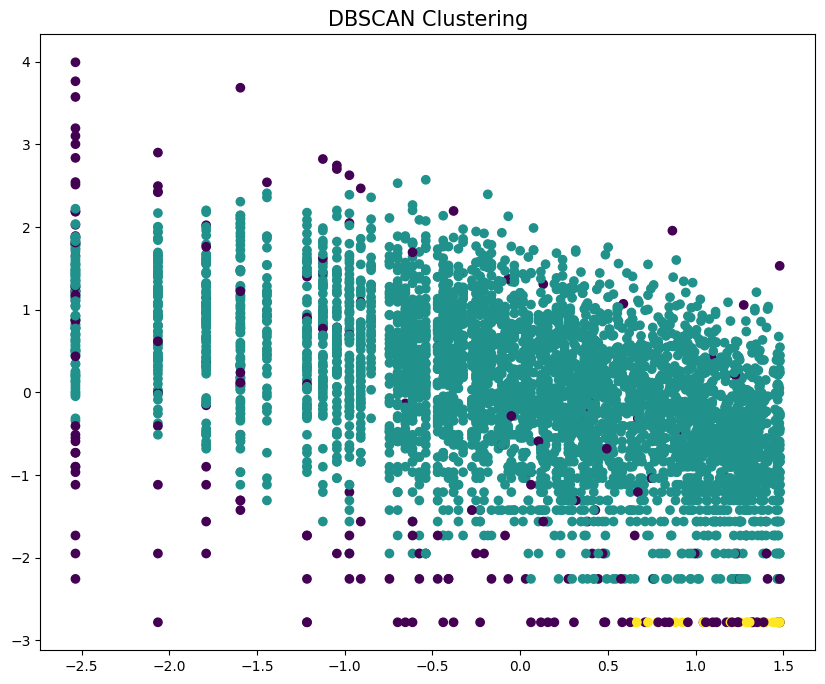

In [201]:
# fitting DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=15)
y_pred = dbscan.fit_predict(norm_data)

# plotting resulting clusters of DBSCAN
plt.figure(figsize=(10,8))
plt.scatter(norm_data[:,0], norm_data[:,1], c=y_pred)
plt.title('DBSCAN Clustering', fontsize=15)
plt.show()

There is noise in the model. Therefore, we need to find the value of epsilon and then train our model again.

**For epsilon, We will be using K-NearestNeighbors**

In [202]:
# finding optimum value of epsilon
from sklearn.neighbors import NearestNeighbors

neighbor = NearestNeighbors(n_neighbors=2)
neigh_ft = neighbor.fit(norm_data)
distances, indices = neigh_ft.kneighbors(norm_data)

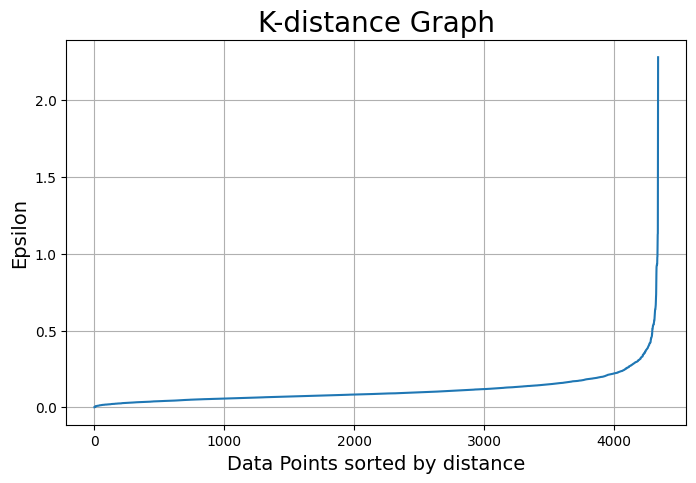

In [203]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

**The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 0.4 in this case.**

In [204]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.4,min_samples=15)
dbscan_opt.fit(X)

DBSCAN(eps=0.4, min_samples=15)

In [205]:
rfm_df['DBSCAN_opt_labels']=dbscan_opt.labels_
rfm_df['DBSCAN_opt_labels'].value_counts()

 0    3829
-1     409
 1      78
 2      22
Name: DBSCAN_opt_labels, dtype: int64

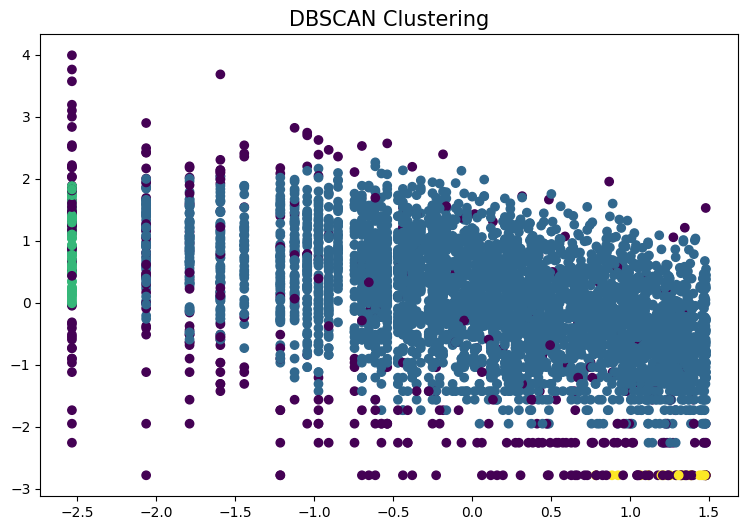

In [206]:
y_pred_opt=dbscan_opt.fit_predict(norm_data)

# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(norm_data[:, 0], norm_data[:, 1],c=y_pred_opt)
plt.title('DBSCAN Clustering',fontsize=15)
plt.show()

**The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0 and 1 are the two different clusters, and -1 is the noise.**

## **Result**

In [207]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster,HR_labels,DBSCAN_opt_labels
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,1,1,-1
12347.0,2,182,4310.00,4,4,4,444,12,0,0,0
12348.0,75,31,1797.24,2,2,4,224,8,1,0,0
12349.0,18,73,1757.55,3,3,4,334,10,0,0,0
12350.0,310,17,334.40,1,1,2,112,4,1,1,0


In [208]:
# Calculate average RFM values and size for each cluster
cluster_summary = rfm_df.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': 'mean',}).round(0)

cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,30.0,174.0,4066.0
1,140.0,25.0,474.0


After performing K-means clustering and finding optimal value of clusters as k=2 using elbow method and silhoutte score we assigned the clusters to our RFM data.

We can observe following clusters of customers:

**Wholesalers** - 'Cluster 0' is the high value customer segment as the customers in this group has least mean recency with high mean frequency. They are also the ones who have high mean monetary value.

**Average Customers** - It is quite evident that 'Cluster 1' has customers who rarely shop i.e mean recency is 140 days and when they order, their orders are pretty low valued.

Apart from the numbers, the visualization of clusters in Silhouette Analysis show that both customer segments are quite distinct with very little overlap between them.

In [209]:
# Calculate average RFM values and size for each HR_labels
HR_labels_summary = rfm_df.groupby(['HR_labels']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': 'mean',}).round(0)

HR_labels_summary

,Recency,Frequency,Monetary
HR_labels,,,
0,50.0,129.0,2793.0
1,176.0,14.0,585.0


The dendrogram also depicted the number of clusters as 2. We saw in Hierarchical clustering the customers were well grouped using 2 clusters. Looking at the above summary we can observe the same as K-means clustering. Here, mean renency for both clusters have decreased whereas mean frequency and monetary have increased as compared to K-means clustering.

**Wholesale Customers** - 'Cluster 0' is the high value customer segment as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently. These are the wholesale customers of the retail store.

**Average Customers** - 'Cluster 1' is the average customer segment. These customers order less frequent than the wholesale customers and their orders are pretty low valued.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [210]:
# loading dependency
# from sklearn.externals import joblib
import joblib

In [211]:
# Save the model using joblib
joblib.dump(cluster, 'agg_clustering_model.pkl')

['agg_clustering_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [212]:
# Load the saved model
loaded_model = joblib.load('agg_clustering_model.pkl')

# Use the loaded model to make predictions
predictions = loaded_model.fit_predict(norm_data)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Challenges**
● Large dataset to handle

● Lot of duplicate and missing values

● Data analysis was challenging

● Tuning the hyperparameters of models and fitting models

# **Conclusion**

* From RFM analysis, manually created three clusters on a quartile basis as high, average and low value customers.
* In K-means clustering, using the elbow method, got the optimal value of clusters as 2. Also, the best silhouette score obtained is when the number of clusters is 2.
* In Hierarchical clustering, the dendrogram also depicted the number of clusters as 2.
* DBSCAN gave us three clusters 0 and 1 the two different clusters, and -1 as the noise which was more.

There are two customer clusters that have been formed as Wholesale customers and average customers.

* **Wholesale Customers** -  the customers in this group place the highest value orders with a very high relative frequency and also transacted most recently.

* **Average Customers** - These customers order less frequent than the wholesale customers and their orders are pretty low valued and also rarely shop.

I can conclude that K-means clustering and Hierarchical clustering can be used for this dataset to segment customers based on RFM analysis.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***